In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, FunctionTransformer

# Puedes elegir otro modelo de regresión
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [178]:
filename_raw = '../data/raw/StudentPerformanceFactors.csv'

In [179]:
df = pd.read_csv(filename_raw)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [180]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [181]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6607.0,2.967610,1.031231,0.0,2.0,3.0,4.0,6.0
Exam_Score,6607.0,67.235659,3.890456,55.0,65.0,67.0,69.0,101.0


In [182]:
df.drop_duplicates(inplace=True)

In [183]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [184]:
df = df.drop(['Distance_from_Home','Parental_Education_Level','Teacher_Quality'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  School_Type                 6607 non-null   object
 12  Peer_Influence              6607 non-null   object
 13  Physical_Activity           6607 non-null   int6

In [185]:
print('-'*40)
print('1. - VALORES TOTALES  ')


for col in df:
    print('-'*40)
    print(df[col].value_counts())

----------------------------------------
1. - VALORES TOTALES  
----------------------------------------
Hours_Studied
20    465
19    441
21    431
23    411
22    402
18    401
17    381
24    357
16    351
15    315
25    289
14    269
26    263
27    229
13    218
12    192
28    171
11    146
29    134
30    123
10     94
9      86
31     77
8      58
32     54
7      51
33     40
34     29
5      21
35     20
4      17
6      17
3      12
36     11
38      7
39      7
2       6
37      6
1       3
43      1
44      1
Name: count, dtype: int64
----------------------------------------
Attendance
67     190
98     187
76     185
77     184
64     182
94     180
91     175
84     175
79     175
82     173
69     170
68     170
80     169
96     168
73     168
81     168
93     167
72     167
74     165
78     165
61     164
95     163
71     162
89     162
97     161
70     161
65     158
83     157
90     156
63     155
88     155
92     154
99     154
62     152
87     151
86     1

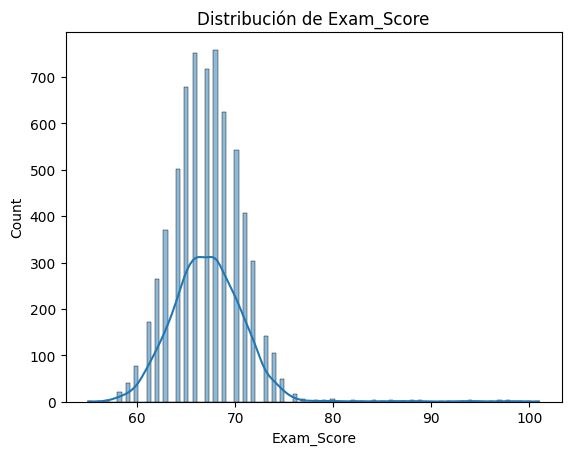

In [186]:
# Distribución de la variable objetivo
sns.histplot(df['Exam_Score'], kde=True)
plt.title('Distribución de Exam_Score')
plt.show()

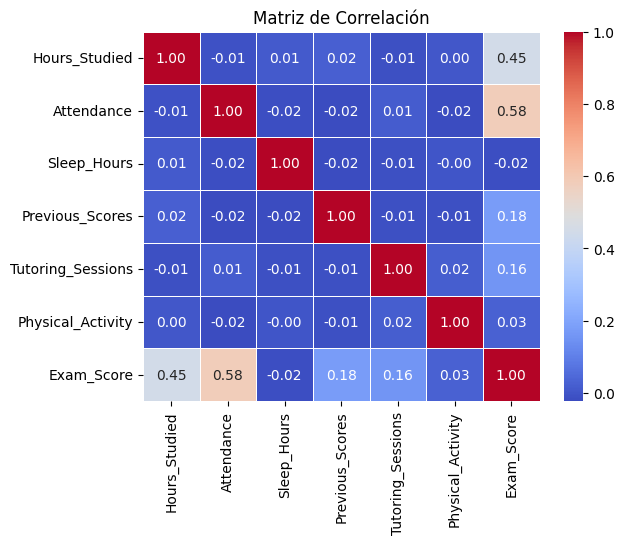

In [187]:
# Correlación entre variables numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation = df[numeric_cols].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [188]:
def get_feature_names(column_transformer):
    """
    Extrae los nombres de las columnas del ColumnTransformer.
    Para cada transformer:
      - Si implementa get_feature_names_out, se usa ese método.
      - Si no, se utilizan los nombres originales de las columnas.
    """
    output_features = []

    # Recorremos cada transformer
    for name, transformer, columns in column_transformer.transformers_:
        if transformer == 'drop' or transformer is None:
            continue
        # Si el transformer es 'passthrough'
        if transformer == 'passthrough':
            output_features.extend(columns)
        else:
            # En caso de que el transformer sea un Pipeline
            if isinstance(transformer, Pipeline):
                # Intentamos usar el método get_feature_names_out del último paso
                try:
                    names = transformer[-1].get_feature_names_out(columns)
                except AttributeError:
                    # Si no está implementado, usamos los nombres originales
                    names = columns
            else:
                try:
                    names = transformer.get_feature_names_out(columns)
                except AttributeError:
                    names = columns
            output_features.extend(names)
    return output_features

In [189]:
# Variables numéricas
numeric_features = ["Hours_Studied", "Attendance", "Sleep_Hours", "Previous_Scores",
                    "Tutoring_Sessions", "Physical_Activity"]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [190]:
# Variables ordinales (con categorías: low, medium, high)
ordinal_features = ["Access_to_Resources", "Parental_Involvement",
                    "Motivation_Level", "Family_Income"]
# Corrección: Es mejor definir categorías específicas para cada variable
# en caso de que tengan diferentes conjuntos de valores
ordinal_categories = [["Low", "Medium", "High"]] * \
    len(ordinal_features)  # Nota: Mayúsculas para consistencia
ordinal_transformer = Pipeline(steps=[
    ('encoder', OrdinalEncoder(categories=ordinal_categories,
     handle_unknown='use_encoded_value', unknown_value=-1)),
    ('scaler', StandardScaler())  # Escalamos para homogeneizar la magnitud
])

In [191]:
# Para la variable Peer_Influence, definimos un mapeo customizado:
peer_influence_mapping = {"Negative": -1, "Neutral": 0, "Positive": 1}


def map_peer_influence(X):
    """
    Esta función mapea los valores de Peer_Influence según el diccionario.
    Se espera que X sea un array 2D (n_samples, 1).
    """
    # Corrección: Aseguramos que X sea un array
    X_array = np.array(X)
    # Corrección: Verificamos la forma del array para manejar series o arrays 1D
    if X_array.ndim == 1:
        return np.array([peer_influence_mapping.get(val, 0) for val in X_array])
    else:
        return np.array([[peer_influence_mapping.get(val, 0) for val in row] for row in X_array])

In [192]:
# Variable ordinal especial: Peer_Influence (se mapeará a -1, 0, 1)
peer_influence_feature = ["Peer_Influence"]
peer_influence_transformer = Pipeline(steps=[
    ('mapper', FunctionTransformer(map_peer_influence, validate=False)),
    ('scaler', StandardScaler())
])

In [193]:
# Variables binarias (con opciones Yes/No)
binary_features = ["Extracurricular_Activities",
                   "Internet_Access", "Learning_Disabilities"]
# Definimos categorías para que "No" se codifique como 0 y "Yes" como 1
binary_categories = [["No", "Yes"]] * len(binary_features)
binary_transformer = Pipeline(steps=[
    ('encoder', OrdinalEncoder(categories=binary_categories))
])

In [194]:
# Variables nominales (ej. School_Type y Gender)
nominal_features = ["School_Type", "Gender"]
nominal_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
    # Corrección: sparse_output=False para obtener arrays normales en lugar de matrices dispersas
])

In [195]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('ord', ordinal_transformer, ordinal_features),
        ('peer', peer_influence_transformer, peer_influence_feature),
        ('bin', binary_transformer, binary_features),
        ('nom', nominal_transformer, nominal_features)
    ],
)

In [196]:
X = df.drop("Exam_Score", axis=1)
y = df["Exam_Score"]

preprocessor.fit(X)
X_preprocessed = preprocessor.transform(X)

In [197]:
# 1. Verificar la forma del dataset preprocesado
print("Shape del dataset preprocesado:", X_preprocessed.shape)

Shape del dataset preprocesado: (6607, 16)


In [198]:
# Obtenemos los nombres de las columnas preprocesadas
feature_names = get_feature_names(preprocessor)

# Creamos un DataFrame con los nombres de columna
df_preprocessed = pd.DataFrame(X_preprocessed, columns=feature_names)

print("Nombres de columnas resultantes:")
print(df_preprocessed.columns)

Nombres de columnas resultantes:
Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Access_to_Resources',
       'Parental_Involvement', 'Motivation_Level', 'Family_Income',
       'Peer_Influence', 'Extracurricular_Activities', 'Internet_Access',
       'Learning_Disabilities', 'School_Type_Public', 'Gender_Male'],
      dtype='object')


In [199]:
# 2. Mostrar las primeras 5 filas del resultado preprocesado
print("\nDataset preprocesado:")
df_preprocessed.head()



Dataset preprocesado:


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Access_to_Resources,Parental_Involvement,Motivation_Level,Family_Income,Peer_Influence,Extracurricular_Activities,Internet_Access,Learning_Disabilities,School_Type_Public,Gender_Male
0,0.504942,0.348375,-0.019796,-0.143800,-1.213934,0.031411,1.288574,-1.562146,-1.302866,-1.060721,1.070550,0.0,1.0,0.0,1.0,1.0
1,-0.162822,-1.383736,0.661399,-1.116110,0.411451,1.001199,-0.143488,-1.562146,-1.302866,0.285971,-1.575587,0.0,1.0,0.0,1.0,0.0
2,0.671882,1.560853,-0.019796,1.106313,0.411451,1.001199,-0.143488,-0.124267,0.134442,0.285971,-0.252518,1.0,1.0,0.0,1.0,1.0
3,1.506587,0.781403,0.661399,1.592469,-0.401242,1.001199,-0.143488,-1.562146,0.134442,0.285971,-1.575587,1.0,1.0,0.0,1.0,1.0
4,-0.162822,1.041220,-0.700990,-0.699406,1.224144,1.001199,-0.143488,-0.124267,0.134442,0.285971,-0.252518,1.0,1.0,0.0,1.0,0.0


In [200]:
# 3. Revisar algunas estadísticas descriptivas
print("\nEstadísticas descriptivas del dataset preprocesado:")
df_preprocessed.describe().T


Estadísticas descriptivas del dataset preprocesado:


,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,-1.161474e-16,1.000076,-3.167760,-0.663645,0.004119,0.671882,4.010702
Attendance,6607.0,-3.089199e-16,1.000076,-1.730158,-0.864103,0.001953,0.868009,1.734065
Sleep_Hours,6607.0,-2.016449e-16,1.000076,-2.063380,-0.700990,-0.019796,0.661399,2.023788
Previous_Scores,6607.0,2.048712e-16,1.000076,-1.741167,-0.838307,-0.004898,0.897961,1.731370
Tutoring_Sessions,6607.0,7.850707e-17,1.000076,-1.213934,-0.401242,-0.401242,0.411451,5.287608
Physical_Activity,6607.0,-1.720703e-17,1.000076,-2.877953,-0.938377,0.031411,1.001199,2.940776
Access_to_Resources,6607.0,1.170885e-16,1.000076,-1.575549,-0.143488,-0.143488,1.288574,1.288574
Parental_Involvement,6607.0,-1.623913e-16,1.000076,-1.562146,-0.124267,-0.124267,1.313613,1.313613
Motivation_Level,6607.0,-2.796142e-17,1.000076,-1.302866,-1.302866,0.134442,0.134442,1.571749
Family_Income,6607.0,-7.312987e-17,1.000076,-1.060721,-1.060721,0.285971,0.285971,1.632663


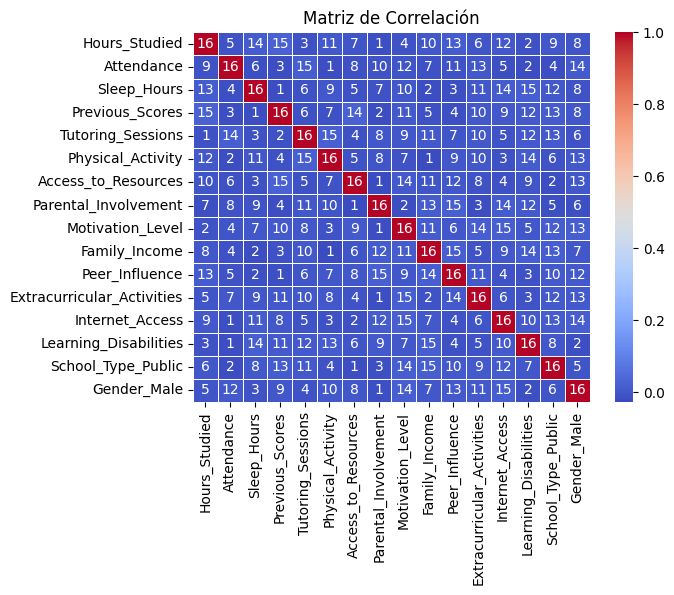

In [201]:
correlation = df_preprocessed.corr()

sns.heatmap(correlation, annot=correlation.rank(
    axis="columns"), cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [202]:
X_with_target = pd.concat(
    [df_preprocessed, y], axis=1)
correlations = X_with_target.corr()['Exam_Score'].sort_values(ascending=False)
print("\nCorrelaciones con Exam_Score:")
correlations


Correlaciones con Exam_Score:


Exam_Score                    1.000000
Attendance                    0.581072
Hours_Studied                 0.445455
Previous_Scores               0.175079
Access_to_Resources           0.169770
Parental_Involvement          0.157114
Tutoring_Sessions             0.156525
Peer_Influence                0.100217
Family_Income                 0.094555
Motivation_Level              0.086937
Extracurricular_Activities    0.064382
Internet_Access               0.051475
Physical_Activity             0.027824
Gender_Male                  -0.002032
School_Type_Public           -0.008844
Sleep_Hours                  -0.017022
Learning_Disabilities        -0.085066
Name: Exam_Score, dtype: float64

In [203]:
# 1. Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True)

In [204]:
# 2. Crear un pipeline que incluya el preprocesamiento y el modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [205]:
# 3. Entrenar el modelo
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Hours_Studied',
                                                   'Attendance', 'Sleep_Hours',
                                                   'Previous_Scores',
                                                   'Tutoring_Sessions',
                                                   'Physical_Activity']),
                                                 ('ord',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Low',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Low',
                                                                                               'Medium',
                                                                                               'Hig...
                                                 ('bin',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder(categories=[['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes']]))]),
                                                  ['Extracurricular_Activities',
                                                   'Internet_Access',
                                                   'Learning_Disabilities']),
                                                 ('nom',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['School_Type', 'Gender'])])),
                ('regressor', LinearRegression())])

In [206]:
# 4. Evaluar el modelo en el conjunto de prueba
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE en test:", mse)
print("R² en test:", r2)

MSE en test: 3.6043232602905695
R² en test: 0.745008505109463


In [207]:
# Crear un dataframe con la columna posttest
results = pd.DataFrame()
# Añadir la columna posttest con los valores
results['Exam_Score'] = df['Exam_Score']

In [208]:
# Añadir la columna predict con las predicciones del modelo
results['predict'] = pipeline.predict(X)

In [209]:
# Calcular el error
results['error'] = results['Exam_Score']-results['predict']

In [210]:
results['abs error'] = np.abs(results['error'])

In [211]:
results['sqr error'] = results['error']**2

In [212]:
results.head(20)

,Exam_Score,predict,error,abs error,sqr error
0,67,67.239643,-0.239643,0.239643,0.057429
1,61,61.055765,-0.055765,0.055765,0.003110
2,74,73.526072,0.473928,0.473928,0.224608
3,71,71.482353,-0.482353,0.482353,0.232665
4,70,70.123855,-0.123855,0.123855,0.015340
5,71,70.800827,0.199173,0.199173,0.039670
6,67,68.092896,-1.092896,1.092896,1.194421
7,66,66.989338,-0.989338,0.989338,0.978789
8,69,69.562316,-0.562316,0.562316,0.316199
9,72,72.444372,-0.444372,0.444372,0.197467


In [ ]:
# 2. Extraer los coeficientes del modelo
coefs = pipeline.named_steps['regressor'].coef_

In [220]:
# 3. Crear un DataFrame con la importancia (valor absoluto de los coeficientes)
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefs,
    'importance': np.abs(coefs)
}).sort_values('importance', ascending=False)

feature_importance

,feature,coefficient,importance
1,Attendance,2.309111,2.309111
0,Hours_Studied,1.749364,1.749364
12,Internet_Access,0.943814,0.943814
13,Learning_Disabilities,-0.871611,0.871611
6,Access_to_Resources,0.722912,0.722912
3,Previous_Scores,0.709943,0.709943
7,Parental_Involvement,0.697673,0.697673
4,Tutoring_Sessions,0.633109,0.633109
11,Extracurricular_Activities,0.587964,0.587964
9,Family_Income,0.401891,0.401891
